<a href="https://colab.research.google.com/github/mintusf/CIFAR/blob/master/Encoder3_83%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=19b0kUvuPGl6U4Cj4VgTfYTc7gK5VgA09'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_X')

link = 'https://drive.google.com/open?id=1ejj9Qt4Ah9IOSmKnM87-oGe-IytAxM2F'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_Y')

link = 'https://drive.google.com/open?id=1KzllioQ321D7zAHlmasN-tagGcE6pCnC'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_X')

link = 'https://drive.google.com/open?id=1m3E519AgJkPbsTNGvEwSHCN6otXNB1Y0'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_Y')

link = 'https://drive.google.com/open?id=10mFBsqasbIcrbLrWqqkMyw41OczlcYID'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_X')

link = 'https://drive.google.com/open?id=1r3zB1bwH6ZjrLZjQftaqHAr-9wGra3Uj'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_Y')

link = 'https://drive.google.com/open?id=1B3YZrKYnxvAQmC-I6i8vm998qP5izhbA'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_X_original')

link = 'https://drive.google.com/open?id=1mxKxn8s1qMCoX9mvBAd-0wCUKQUSVZ2p'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dev_Y_original')

link = 'https://drive.google.com/open?id=1z2TFC3cFLsN7qQcg86ILb2Gv4lXUM19m'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_X_original')

link = 'https://drive.google.com/open?id=1TL3GJFCvwxwK5DqqZhTveb_jKmPS0AiK'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test_Y_original')

link = 'https://drive.google.com/open?id=1Fa_uK2z1fpL6GyRosGQvtFx5eYjz7IdJ'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_X_augmented')

link = 'https://drive.google.com/open?id=170pj5QRqB4RlxakUaZZ5PXjD1cAu_ItV'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train_Y_augmented')
X_train = np.load('Train_X')/255.
Y_train_1d = np.load('Train_Y')
X_dev = np.load('Dev_X')/255.
Y_dev_1d = np.load('Dev_Y')
X_test = np.load('Test_X')/255.
Y_test_1d = np.load('Test_Y')
X_dev_original = np.load('Dev_X_original')/255.
Y_dev_original_1d = np.load('Dev_Y_original')
X_test_original = np.load('Test_X_original')/255.
Y_test_original_1d = np.load('Test_Y_original')
X_train_augmented = np.load('Train_X_augmented')/255.
Y_train_augmented_1d = np.load('Train_Y_augmented')
(X_train_original, Y_train_original), _ = cifar10.load_data()
X_train_original = X_train_original/255.

19b0kUvuPGl6U4Cj4VgTfYTc7gK5VgA09
1ejj9Qt4Ah9IOSmKnM87-oGe-IytAxM2F
1KzllioQ321D7zAHlmasN-tagGcE6pCnC
1m3E519AgJkPbsTNGvEwSHCN6otXNB1Y0
10mFBsqasbIcrbLrWqqkMyw41OczlcYID
1r3zB1bwH6ZjrLZjQftaqHAr-9wGra3Uj
1B3YZrKYnxvAQmC-I6i8vm998qP5izhbA
1mxKxn8s1qMCoX9mvBAd-0wCUKQUSVZ2p
1z2TFC3cFLsN7qQcg86ILb2Gv4lXUM19m
1TL3GJFCvwxwK5DqqZhTveb_jKmPS0AiK
1Fa_uK2z1fpL6GyRosGQvtFx5eYjz7IdJ
170pj5QRqB4RlxakUaZZ5PXjD1cAu_ItV
170500096/170498071 [==============================] - 11s 0us/step


In [3]:
X_train = np.load('Train_X')/255.
Y_train_1d = np.load('Train_Y')
X_dev = np.load('Dev_X')/255.
Y_dev_1d = np.load('Dev_Y')
X_test = np.load('Test_X')/255.
Y_test_1d = np.load('Test_Y')
X_dev_original = np.load('Dev_X_original')/255.
Y_dev_original_1d = np.load('Dev_Y_original')
X_test_original = np.load('Test_X_original')/255.
Y_test_original_1d = np.load('Test_Y_original')
X_train_augmented = np.load('Train_X_augmented')/255.
Y_train_augmented_1d = np.load('Train_Y_augmented')
(X_train_original, Y_train_original), _ = cifar10.load_data()
X_train_original = X_train_original/255.
Y_train = np.eye(10)[Y_train_1d.reshape(-1)]
print(Y_train.shape)
Y_dev = np.eye(10)[Y_dev_1d.reshape(-1)]
print(Y_dev.shape)
Y_dev_original = np.eye(10)[Y_dev_original_1d.reshape(-1)]
print(Y_dev_original.shape)
Y_train_augmented = np.eye(10)[Y_train_augmented_1d.reshape(-1)]
print(Y_train_augmented.shape)
Y_train_original = np.eye(10)[Y_train_original.reshape(-1)]
print(Y_train_original.shape)
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout,UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model


(42500, 10)
(8750, 10)
(5000, 10)
(50000, 10)
(50000, 10)


In [0]:
def Autoencoder (input_img):

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)  # 32x32x64
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)# 32x32x64
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)# 16x16x64
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)# 16x16x128
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)# 16x16x128
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)# 8x8x128
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)# 8x8x256
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)# 8x8x256
    x = BatchNormalization()(x)
    encoded = x

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    return (encoded, decoded)

Next is encoded trained on 42500 images and with 256 batch

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_141 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_142 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 16, 16, 128)       738

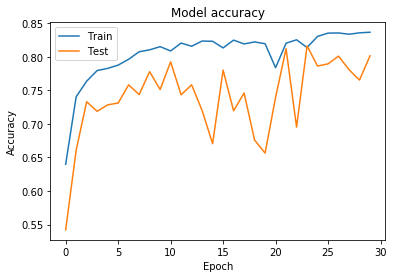

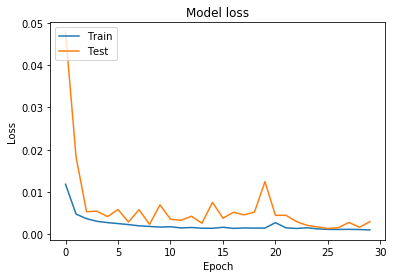

In [34]:

with tf.device('/device:GPU:0'):


  input_img = Input(shape = (32,32,3))
  model_autoenc = Model(input_img,Autoencoder(input_img)[1])


  Adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model_autoenc.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

  model_autoenc.summary()
  history = model_autoenc.fit(X_train, X_train, validation_data=(X_dev_original, X_dev_original), epochs = 30, batch_size = 256)




  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  """
  for i in idx:
      step1 = data[i,:].reshape(3,32,32)
      step2 = np.transpose(step1,axes = (1,2,0))
      plt.imshow(step2)
      plt.show()
      print(names[labels[i]])
  """


Next is encoder trained on augmented, filled dataset and with 256 batch

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_153 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_154 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 16, 16, 128)       738

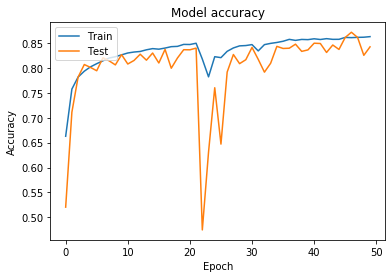

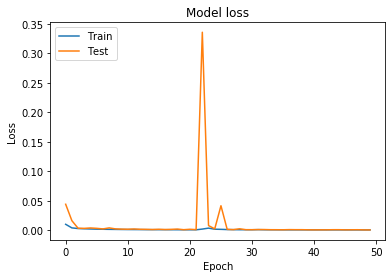

In [35]:

with tf.device('/device:GPU:0'):


  input_img = Input(shape = (32,32,3))
  model_autoenc = Model(input_img,Autoencoder(input_img)[1])


  Adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model_autoenc.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

  model_autoenc.summary()
  history = model_autoenc.fit(X_train_augmented, X_train_augmented, validation_data=(X_dev_original, X_dev_original), epochs = 50, batch_size = 256)




  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  """
  for i in idx:
      step1 = data[i,:].reshape(3,32,32)
      step2 = np.transpose(step1,axes = (1,2,0))
      plt.imshow(step2)
      plt.show()
      print(names[labels[i]])
  """


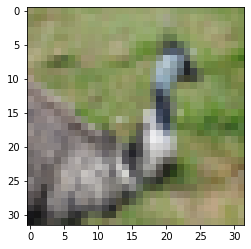

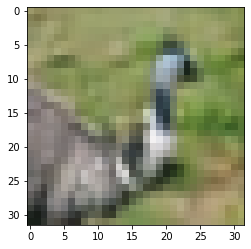

In [36]:
#model_autoenc.save_weights('autoencoder.h5')
model_autoenc.get_weights()[0][1][1][1]
decoded = model_autoenc.predict(np.reshape(X_test[5],(-1,32,32,3)))
plt.imshow(X_test[5])
plt.show()
plt.imshow(decoded[0])

Next model was trained with Encoder trained on 42500data

In [0]:
from __future__ import print_function
with tf.device('/device:GPU:0'):
  
  from tensorflow.keras.datasets import cifar10
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
  from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
  from tensorflow.keras import optimizers
  import numpy as np
  #from tensorflow.keras.layers.core import Lambda
  from tensorflow.keras import backend as K
  from tensorflow.keras import regularizers

  class cifar10vgg:
      def __init__(self,learning_rate,x_train,y_train,train=True):
          self.num_classes = 10
          self.weight_decay = 0
          self.x_shape = [32,32,3]
          encoded = Autoencoder(input_img)[0] #using encoder
          self.model = Model(input_img,self.build_model(encoded))
          for l1,l2 in zip(self.model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
            l1.set_weights(l2.get_weights())
          #print(model_autoenc.get_weights()[0][1][1])
          #print(self.model.get_weights()[0][1][1])
          for layer in self.model.layers[0:15]:
            layer.trainable = False
          if train:
              self.model.summary()
              self.model = self.train(self.model,learning_rate,x_train,y_train)
          else:
              self.model.load_weights('cifar10vgg.h5')


      def build_model(self,encoded):
          # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

          weight_decay = self.weight_decay

          #X = Conv2D(64, (3, 3), padding='same',
          #                input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.2)(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)
          #X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          #X = Dropout(0.2)(X)

          #X = Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)      
          #X = Dropout(0.3)(X)

          #X = Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = MaxPooling2D(pool_size=(2, 2))(X)


          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)    
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = MaxPooling2D(pool_size=(2, 2))(X)


          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)     
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)     
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = Conv2D(1024,(1,1),padding = 'same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          #X = Dropout(0.4)(X)

          X = Flatten()(X)
          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          #X = Dropout(0.4)(X)

          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          #X = Dropout(0.4)(X)

          X = Dense(self.num_classes)(X)
          X = Activation('softmax')(X)
          
          return X


      def normalize(self,X_train,X_test):
          #this function normalize inputs for zero mean and unit variance
          # it is used when training a model.
          # Input: training set and test set
          # Output: normalized training set and test set according to the trianing set statistics.
          mean = np.mean(X_train,axis=(0,1,2,3))
          std = np.std(X_train, axis=(0, 1, 2, 3))
          X_train = (X_train-mean)/(std+1e-7)
          X_test = (X_test-mean)/(std+1e-7)
          return X_train, X_test

      def normalize_production(self,x):
          #this function is used to normalize instances in production according to saved training set statistics
          # Input: X - a training set
          # Output X - a normalized training set according to normalization constants.

          #these values produced during first training and are general for the standard cifar10 training set normalization
          mean = 120.707
          std = 64.15
          return (x-mean)/(std+1e-7)
          

      def predict(self,x,normalize=True,batch_size=50):
          if normalize:
              x = self.normalize_production(x)
          return self.model.predict(x,batch_size)

      def train(self,model_classifier,learning_rate,x_train,y_train):

          #training parameters
          batch_size = 128
          maxepoches = 100
          learning_rate = learning_rate
          lr_decay = 1e-5
          lr_decay = 0
          lr_drop = 20
          # The data, shuffled and split between train and test sets:
          #(x_train, y_train), (x_test, y_test) = cifar10.load_data()
          #x_train = x_train.astype('float32')
          #x_test = x_test.astype('float32')
          #x_train, x_test = self.normalize(x_train, x_test)

          #y_train = tf.keras.utils.to_categorical(y_train, self.num_classes)
          #y_test = tf.keras.utils.to_categorical(y_test, self.num_classes)

          def lr_scheduler(epoch):
              return learning_rate * (0.5 ** (epoch // lr_drop))
          reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

          #data augmentation
          datagen = ImageDataGenerator(
              featurewise_center=False,  # set input mean to 0 over the dataset
              samplewise_center=False,  # set each sample mean to 0
              featurewise_std_normalization=False,  # divide inputs by std of the dataset
              samplewise_std_normalization=False,  # divide each input by its std
              zca_whitening=False,  # apply ZCA whitening
              rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              zoom_range=0.1,
              shear_range=0.1,
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False)  # randomly flip images
          # (std, mean, and principal components if ZCA whitening is applied).
          datagen.fit(x_train)



          #optimization details
          sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

          mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
          mask = np.reshape(mask,(10,1))
          def customLoss(yTrue,yPred):
            print(yTrue.shape)
            return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
          #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
          model_classifier.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

          # training process in a for loop with learning rate drop every 25 epoches.

          class_weight = {0: 1.,1: 1.,2: 2.,3: 2.,4: 2.,5: 1.,6: 1.,7: 1.,8: 1.,9: 1.}

          history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=maxepoches,
                              validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
          
          #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

          model_classifier.save_weights('cifar10vgg.h5')
          
          plt.plot(history.history['acc'])
          plt.plot(history.history['val_acc'])
          plt.title('Model accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          # Plot training & validation loss values
          plt.plot(history.history['loss'])
          plt.plot(history.history['val_loss'])
          plt.title('Model loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          return model_classifier





Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_124 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_125 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 16, 16, 128)       738

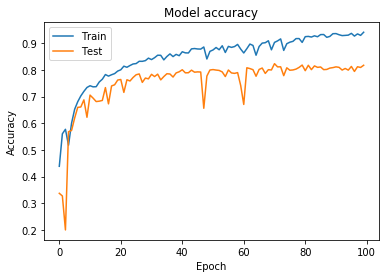

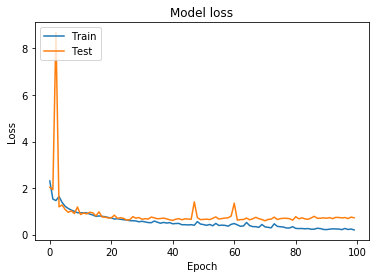

In [32]:
x_train = X_train_augmented
x_test = X_dev_original
y_train = Y_train_augmented
y_test = Y_dev_original
x_train = X_train
y_train = Y_train

#model_classifier2 is saved

#model_classifier1 = cifar10vgg(0.001,x_train,y_train)
model_classifier3 = cifar10vgg(0.1,x_train,y_train)
#model_classifier3 = cifar10vgg(0.01,x_train,y_train)

#predicted_x = model_classifier.predict(x_test)
#residuals = np.argmax(predicted_x,1)!=np.argmax(y_test,1)

#loss = sum(residuals)/len(residuals)
#print("the validation 0/1 loss is: ",loss)

We can see here overfitting, compare to human error and show variance and bias

Next model is trained with encoder trained on augmented data and additionally Dropout 0.1

In [0]:
from __future__ import print_function
with tf.device('/device:GPU:0'):
  
  from tensorflow.keras.datasets import cifar10
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
  from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
  from tensorflow.keras import optimizers
  import numpy as np
  #from tensorflow.keras.layers.core import Lambda
  from tensorflow.keras import backend as K
  from tensorflow.keras import regularizers

  class cifar10vgg:
      def __init__(self,learning_rate,x_train,y_train,train=True):
          self.num_classes = 10
          self.weight_decay = 0
          self.x_shape = [32,32,3]
          encoded = Autoencoder(input_img)[0] #using encoder
          self.model = Model(input_img,self.build_model(encoded))
          for l1,l2 in zip(self.model.layers[:15],model_autoenc.layers[:15]):#getting weights from encoder
            l1.set_weights(l2.get_weights())
          #print(model_autoenc.get_weights()[0][1][1])
          #print(self.model.get_weights()[0][1][1])
          for layer in self.model.layers[0:15]:
            layer.trainable = False
          if train:
              self.model.summary()
              self.model = self.train(self.model,learning_rate,x_train,y_train)
          else:
              self.model.load_weights('cifar10vgg.h5')


      def build_model(self,encoded):
          # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

          weight_decay = self.weight_decay

          #X = Conv2D(64, (3, 3), padding='same',
          #                input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.2)(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)
          X = Dropout(0.1)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          #X = Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.2)(X)

          X = MaxPooling2D(pool_size=(2, 2))(X)

          X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)      
          X = Dropout(0.1)(X)

          #X = Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = MaxPooling2D(pool_size=(2, 2))(X)


          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)    
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = MaxPooling2D(pool_size=(2, 2))(X)


          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)     
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)     
          #X = Dropout(0.3)(X)

          #X = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(X)
          #X = BatchNormalization()(X)
          #X = Activation('relu')(X)
          #X = Dropout(0.3)(X)

          #X = Conv2D(1024,(1,1),padding = 'same',kernel_regularizer=regularizers.l2(weight_decay))(encoded)
          #X = Dropout(0.4)(X)

          X = Flatten()(X)
          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = Dense(1024,kernel_regularizer=regularizers.l2(weight_decay))(X)
          X = BatchNormalization()(X)
          X = Activation('relu')(X)  
          X = Dropout(0.1)(X)

          X = Dense(self.num_classes)(X)
          X = Activation('softmax')(X)
          
          return X


      def normalize(self,X_train,X_test):
          #this function normalize inputs for zero mean and unit variance
          # it is used when training a model.
          # Input: training set and test set
          # Output: normalized training set and test set according to the trianing set statistics.
          mean = np.mean(X_train,axis=(0,1,2,3))
          std = np.std(X_train, axis=(0, 1, 2, 3))
          X_train = (X_train-mean)/(std+1e-7)
          X_test = (X_test-mean)/(std+1e-7)
          return X_train, X_test

      def normalize_production(self,x):
          #this function is used to normalize instances in production according to saved training set statistics
          # Input: X - a training set
          # Output X - a normalized training set according to normalization constants.

          #these values produced during first training and are general for the standard cifar10 training set normalization
          mean = 120.707
          std = 64.15
          return (x-mean)/(std+1e-7)
          

      def predict(self,x,normalize=True,batch_size=50):
          if normalize:
              x = self.normalize_production(x)
          return self.model.predict(x,batch_size)

      def train(self,model_classifier,learning_rate,x_train,y_train):

          #training parameters
          batch_size = 128
          maxepoches = 100
          learning_rate = learning_rate
          lr_decay = 1e-5
          lr_decay = 0
          lr_drop = 20
          # The data, shuffled and split between train and test sets:
          #(x_train, y_train), (x_test, y_test) = cifar10.load_data()
          #x_train = x_train.astype('float32')
          #x_test = x_test.astype('float32')
          #x_train, x_test = self.normalize(x_train, x_test)

          #y_train = tf.keras.utils.to_categorical(y_train, self.num_classes)
          #y_test = tf.keras.utils.to_categorical(y_test, self.num_classes)

          def lr_scheduler(epoch):
              return learning_rate * (0.5 ** (epoch // lr_drop))
          reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

          #data augmentation
          datagen = ImageDataGenerator(
              featurewise_center=False,  # set input mean to 0 over the dataset
              samplewise_center=False,  # set each sample mean to 0
              featurewise_std_normalization=False,  # divide inputs by std of the dataset
              samplewise_std_normalization=False,  # divide each input by its std
              zca_whitening=False,  # apply ZCA whitening
              rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              zoom_range=0.1,
              shear_range=0.1,
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False)  # randomly flip images
          # (std, mean, and principal components if ZCA whitening is applied).
          datagen.fit(x_train)



          #optimization details
          sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

          mask = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
          mask = np.reshape(mask,(10,1))
          def customLoss(yTrue,yPred):
            print(yTrue.shape)
            return K.categorical_crossentropy(mask*yTrue, yPred, from_logits=False, axis=-1)
          #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
          model_classifier.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

          # training process in a for loop with learning rate drop every 25 epoches.

          class_weight = {0: 1.,1: 1.,2: 2.,3: 2.,4: 2.,5: 1.,6: 1.,7: 1.,8: 1.,9: 1.}

          history = model_classifier.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=maxepoches,
                              validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)
          
          #history = model_classifier.fit(x_train,y_train, batch_size=batch_size,epochs=maxepoches,validation_data=(x_test, y_test),verbose=1,class_weight = class_weight)

          model_classifier.save_weights('cifar10vgg.h5')
          
          plt.plot(history.history['acc'])
          plt.plot(history.history['val_acc'])
          plt.title('Model accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          # Plot training & validation loss values
          plt.plot(history.history['loss'])
          plt.plot(history.history['val_loss'])
          plt.title('Model loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Test'], loc='upper left')
          plt.show()

          return model_classifier





Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_165 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_166 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 16, 16, 128)       738

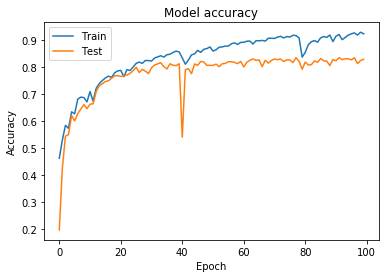

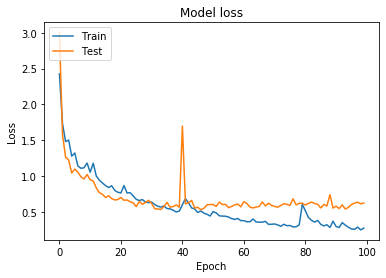

In [38]:
x_train = X_train_augmented
x_test = X_dev_original
y_train = Y_train_augmented
y_test = Y_dev_original
x_train = X_train
y_train = Y_train

#model_classifier2 is saved

#model_classifier1 = cifar10vgg(0.001,x_train,y_train)
model_classifier3 = cifar10vgg(0.1,x_train,y_train)
#model_classifier3 = cifar10vgg(0.01,x_train,y_train)

#predicted_x = model_classifier.predict(x_test)
#residuals = np.argmax(predicted_x,1)!=np.argmax(y_test,1)

#loss = sum(residuals)/len(residuals)
#print("the validation 0/1 loss is: ",loss)

In [1]:
model_classifier3.model


NameError: ignored